# Learning goals of practical
- You can differentiate between marker assistant breeding and genomic selection
- You can describe the interaction between computaional methods and plant crosses
- You can interpret figures generated by them (more specific) 


In [1]:
import os
from pathlib import Path
print(f'Changing to {Path().resolve().parent}')
os.chdir(Path().resolve().parent)

Changing to /home/bnoordijk/vscode_projects/EduXR_minor


In [ ]:
%pip install git+https://github.com/CropXR/EduXR.git

In [2]:
from dsplantbreeding.Population import get_agricultural_population, get_natural_population, get_resilient_population
from dsplantbreeding.actions import perform_cross_between

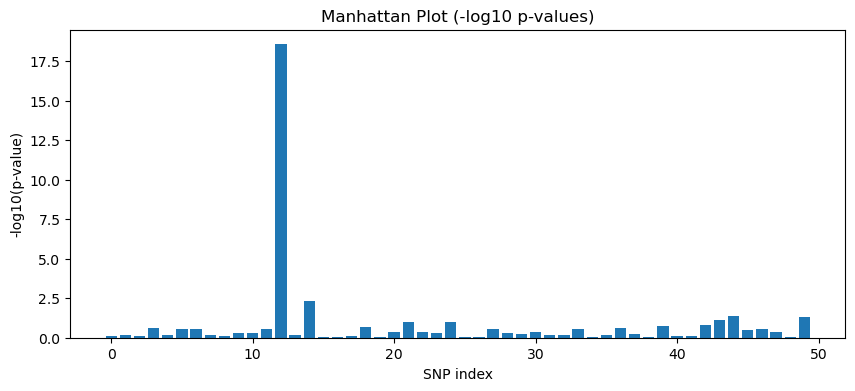

In [3]:
my_population = get_natural_population(n_plants=20)
my_population.show_manhattan_plot(to_phenotype='Salt Resistance')

What does this show? Does it take relations between genes into account?

What happens as the size of the population increases?

What happens as the genetic diversity increases?

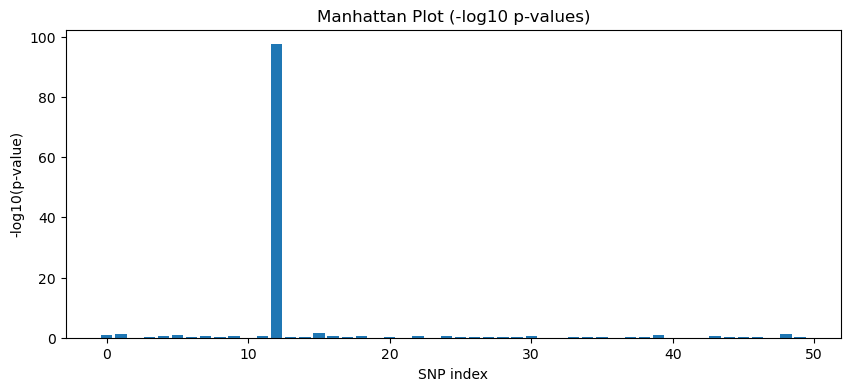

In [4]:
my_population = get_natural_population(n_plants=100)
my_population.show_manhattan_plot(to_phenotype='Salt Resistance')

Now we pick a high-yielding plant (one that farmers already use). And one plant with the desired snp at position 12.
And we start performing back crosses (keep in mind that scanning for markers is a lot easier than checking the phenotype -> in reality you wouldn't be able to check phenotypes for each generation)

In [6]:
resilient_population = get_resilient_population()
resilient_population.show_size()
# Now check if it indeed contains the snps
resilient_population.show_snp_at_location('SNP_12')

Population has 1 plant and 50 SNPs.
[1]


In [7]:
agricultural_population = get_agricultural_population()
agricultural_population.show_snp_at_location('SNP_12')

[0]


In [ ]:
# check difference in phenotypes
resilient_population.show_all_phenotypes()
agricultural_population.show_all_phenotypes()

   Salt Resistance     Yield
0         1.979529  3.979752
   Salt Resistance     Yield
0        -0.020471  8.979752


In [9]:
new_population = perform_cross_between(resilient_population, agricultural_population, n_offspring=10)
selected_population = new_population.select_plants_with_snp_at_location(12, desired_allele=1)
selected_population.n_plants


5

In [ ]:

backcross_1 = perform_cross_between(selected_population, agricultural_population, n_offspring=10)
selected_back1_population = backcross_1.select_plants_with_snp_at_location(12, desired_allele=1)

backcross_2 = perform_cross_between(selected_back1_population, agricultural_population, n_offspring=10)
selected_back2_population = backcross_2.select_plants_with_snp_at_location(12, desired_allele=1)

selected_back2_population.show_all_phenotypes()

   Salt Resistance      Yield
0         1.979529  11.183950
1         2.047894  11.255330
2         1.948056  12.060970
3         1.944427  12.066432
4         2.196578   8.502776
5         2.139341  10.165968


Compare against not using markers:

In [ ]:
new_population = perform_cross_between(resilient_population, agricultural_population, n_offspring=10)
backcross_1 = perform_cross_between(new_population, agricultural_population, n_offspring=10)
backcross_2 = perform_cross_between(backcross_1, agricultural_population, n_offspring=10)
backcross_2.show_all_phenotypes()

   Salt Resistance      Yield
0        -0.020471  13.233724
1         0.047894   8.590382
2        -0.051944   7.761968
3        -0.055573   8.603843
4         0.196578   7.387915
5         0.139341   9.505275
6         0.009291   7.150488
7         0.028175   9.075965
8         0.076902   9.834983
9         0.124643   9.452620


Reflect on why MAS might work for some trait but not others.


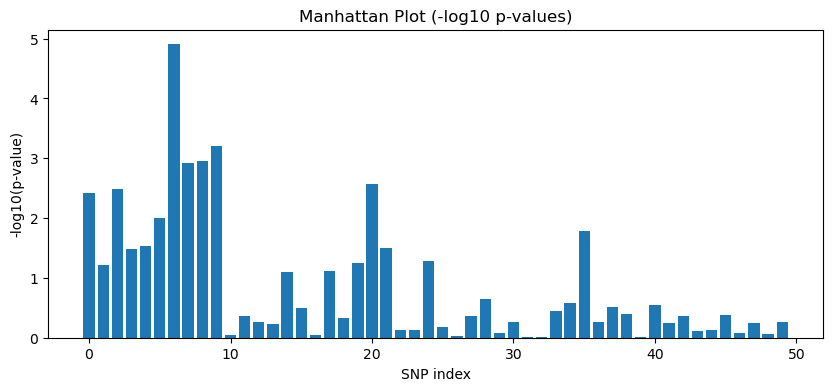

In [12]:
my_population.show_manhattan_plot(to_phenotype='Yield')


## Go back to bit of lecture again